# MLP로 Iris 분류하기
by uramoon@kw.ac.kr
(<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)

꽃받침 길이 (cm), 꽃받침 너비 (cm), 꽃잎 길이 (cm), 꽃잎 너비 (cm)로 Iris setosa, Iris versicolor, Iris virginica를 분류하는 MLP를 만들어 봅시다.

## 데이터셋 만들기
seaborn에서 제공하는 Iris 데이터셋을 사용합니다.<br>
seaborn은 데이터 시각화 도구입니다. (https://seaborn.pydata.org/)

In [1]:
# seaborn 라이브러리로 iris 데이터셋 DataFrame으로 읽어오기
import seaborn as sns
iris = sns.load_dataset("iris")

### 데이터셋 살펴보기

[*pandas*](http://pandas.pydata.org/)를 이용해 데이터를 처리합니다. pandas는 데이터 처리 및 분석에 사용되는 오픈소스 라이브러리입니다. <br>
iris는 pandas DataFrame으로 저장되어 있습니다.

In [2]:
# TODO: 무작위로 10개의 샘플을 확인해보세요.

print(type(iris), iris.shape)
iris.sample(10)

<class 'pandas.core.frame.DataFrame'> (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
59,5.2,2.7,3.9,1.4,versicolor
50,7.0,3.2,4.7,1.4,versicolor
30,4.8,3.1,1.6,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
1,4.9,3.0,1.4,0.2,setosa
126,6.2,2.8,4.8,1.8,virginica
58,6.6,2.9,4.6,1.3,versicolor
84,5.4,3.0,4.5,1.5,versicolor
26,5.0,3.4,1.6,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa


데이터의 통계자료를 확인해봅시다.

In [3]:
# TODO: 통계자료를 확인해보세요. (일부 컬럼은 누락될 수 있습니다.)
# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


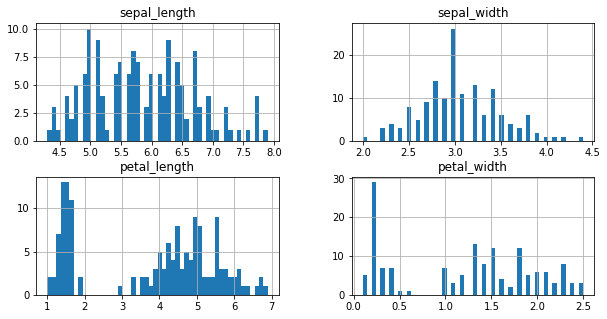

In [4]:
# 히스토그램 그리기

%matplotlib inline
import matplotlib.pyplot as plt
iris.hist(bins=50, figsize=(10,5))
plt.show()

In [5]:
# TODO: 각 컬럼의 데이터 타입과 null 값을 지닌 컬럼이 있는지 확인해보세요.
# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


꽃받침(sepal)의 길이, 너비와 꽃잎(petal)의 길이, 너비로 어떤 꽃인지 예측할 것입니다.

In [6]:
# TODO: 어떤 꽃들이 있는지 알아봅시다.
# Hint: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### 훈련 데이터, 검증 데이터, 테스트 데이터로 나누기
1. 훈련 데이터: 모델을 훈련할 때 직접적으로 사용
2. 검증 데이터: 모델을 훈련할 때 간접적으로 사용
3. 테스트 데이터: 훈련이 끝난 모델의 성능을 평가할 때 사용

일반적으로 훈련 (60%), 검증 (20%), 테스트 (20%)로 나눕니다. <br>
훈련 (80%), 테스트 (20%)로 나눈 후 훈련을 다시 훈련 (80%)과 검증 (20%)으로 나누기도 합니다.<br>

모두 같은 결과를 얻기 위해 train_test_split 함수에 random_state 42를 사용합니다.<br>
42는 '은하수를 여행하는 히치하이커를 위한 안내서'에 등장한 숫자인데 random seed로 종종 사용됩니다.

In [7]:
from sklearn.model_selection import train_test_split

# 훈련 (80%), 테스트 (20%)
train, test = train_test_split(iris, test_size=0.2, random_state=42)

In [8]:
# TODO: train과 test 샘플 수를 확인하세요.
print(len(train))
print(len(test))

print(train)
print(test)

120
30
     sepal_length  sepal_width  petal_length  petal_width     species
22            4.6          3.6           1.0          0.2      setosa
15            5.7          4.4           1.5          0.4      setosa
65            6.7          3.1           4.4          1.4  versicolor
11            4.8          3.4           1.6          0.2      setosa
42            4.4          3.2           1.3          0.2      setosa
..            ...          ...           ...          ...         ...
71            6.1          2.8           4.0          1.3  versicolor
106           4.9          2.5           4.5          1.7   virginica
14            5.8          4.0           1.2          0.2      setosa
92            5.8          2.6           4.0          1.2  versicolor
102           7.1          3.0           5.9          2.1   virginica

[120 rows x 5 columns]
     sepal_length  sepal_width  petal_length  petal_width     species
73            6.1          2.8           4.7          1.2  

## X값과 y값 나누기
지도 학습에서는 데이터 (X)와 답 (y)을 분리하여 모델에 넣어줍니다. X는 여러 값을 지닌 벡터라서 대문자로 표기하고, y는 하나의 값을 지녀 소문자로 표기합니다. (예: MNIST의 X는 784개의 픽셀 값, y는 [0, 9]에 속한 정수)

In [9]:
train_X = train.drop(['species'], axis=1)   # species 열(axis=1)만 제거
train_y = train['species']                  # species 열만 가져오기

# TODO
test_X = test.drop(['species'], axis=1)
test_y = test['species']


print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

(120, 4) (30, 4)
(120,) (30,)


### y값 숫자로 변환하기

인공 신경망에는 setosa, versicolor 등의 string이 입력될 수 없으므로 숫자로 변환해야 합니다.

In [10]:
# 현재의 y값 확인
print(train_y)
# print(train_y.values)

import numpy as np
np.unique(train_y.values)

22         setosa
15         setosa
65     versicolor
11         setosa
42         setosa
          ...    
71     versicolor
106     virginica
14         setosa
92     versicolor
102     virginica
Name: species, Length: 120, dtype: object


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
# LabelEncoder를 사용하여 string 형태의 레이블을 자동으로 변환하도록 설정
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train_y)

LabelEncoder()

In [12]:
# 다음의 클래스들이 0, 1, 2로 맵핑됩니다.
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
# 훈련 레이블 숫자로 변환하기
train_y = le.transform(train_y)
train_y

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [14]:
# TODO: 테스트 레이블 숫자로 변환하기
test_y = le.transform(test_y)
test_y

print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

(120, 4) (30, 4)
(120,) (30,)


## 전처리 하기
Min-max normalization으로 모든 인자의 값을 0과 1사이의 값으로 변환합니다. <br>(https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization))<br>
**(중요) 모든 전처리 기법은 훈련 데이터만 사용하여 학습한 후 다른 데이터 (검증 및 테스트)에 동일하게 적용합니다.**

In [15]:
# 현재 훈련 데이터에서 가장 작은 값과 큰 값을 확인합니다.
import numpy as np

print(train_X.min()) 
print(train_X.max())

sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
dtype: float64
sepal_length    7.7
sepal_width     4.4
petal_length    6.7
petal_width     2.5
dtype: float64


In [16]:
# train_X의 min, max값으로 scaler를 설정합니다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)

MinMaxScaler()

In [17]:
# 0부터 1사이의 NumPy 배열로 변환
train_X = scaler.transform(train_X)

# TODO
test_X = scaler.transform(test_X)

In [18]:
# 잘 변환됐는지 확인

print(train_X.min()) 
print(train_X.max())

# print(train_X)
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

0.0
1.0
(120, 4) (30, 4)
(120,) (30,)


## 모델 만들기
MLP에서 숨겨진 층의 노드 개수는 입력층의 2/3 정도로 설정하는 것이 일반적이지만 최적이 아닐 수도 있으니 직접 실험을 해가며 설정하는 것이 좋습니다. 출력층의 활성화 함수는 출력 중 큰 값에 높은 확률을 할당해주는 함수를 사용합니다. (https://en.wikipedia.org/wiki/Softmax_function)

In [19]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

model = models.Sequential()
model.add(layers.Input(shape=(4, ))) # 입력층의 모양
model.add(layers.Dense(100, activation='relu')) # 숨겨진 층, 원하는 경우 층을 추가하셔도 좋습니다.
model.add(layers.Dense(3, activation='softmax')) # 출력층의 모양 및 활성화 함수

In [20]:
# TODO: 컴파일하기
# 레이블에 one-hot 인코딩을 사용하지 않았으므로 loss에 주의합니다.

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 모델 훈련하기
훈련 데이터를 사용하여 인공신경망의 가중치를 조절합니다. 한 epoch이 끝나면 (훈련 데이터를 완전히 한 번 보고나면) 검증 데이터의 loss를 측정합니다. 훈련 데이터의 loss는 줄어드는데 검증 데이터의 loss가 증가하면 과적합이 일어나는 신호이므로 훈련을 중단합니다. 일시적인 현상에 콜백 함수가 속을 수 있으니 val_loss가 감소하지 않아도 10번의 epochs을 참을 수 있도록 설정해봅시다.


In [21]:
# TODO: 훈련 데이터와 정답으로 모델을 훈련합니다.

model.fit(train_X, train_y, epochs=10000, 
            callbacks=EarlyStopping(patience=10),            # val_loss를 관찰하여 과적합이 일어나면 훈련을 중단합니다. (10번은 참기)
            validation_split=0.2)       # 훈련 데이터의 20%를 검증 데이터로 사용합니다.

Epoch 1/10000
3/3 [==============================] - 8s 194ms/step - loss: 1.0854 - accuracy: 0.5312 - val_loss: 1.1112 - val_accuracy: 0.4167
Epoch 2/10000
3/3 [==============================] - 0s 40ms/step - loss: 1.0505 - accuracy: 0.6146 - val_loss: 1.0773 - val_accuracy: 0.5000
Epoch 3/10000
3/3 [==============================] - 0s 60ms/step - loss: 1.0260 - accuracy: 0.6771 - val_loss: 1.0534 - val_accuracy: 0.5000
Epoch 4/10000
3/3 [==============================] - 0s 56ms/step - loss: 1.0066 - accuracy: 0.7188 - val_loss: 1.0322 - val_accuracy: 0.5000
Epoch 5/10000
3/3 [==============================] - 0s 44ms/step - loss: 0.9858 - accuracy: 0.7188 - val_loss: 1.0130 - val_accuracy: 0.5000
Epoch 6/10000
3/3 [==============================] - 0s 51ms/step - loss: 0.9680 - accuracy: 0.7188 - val_loss: 0.9940 - val_accuracy: 0.5000
Epoch 7/10000
3/3 [==============================] - 0s 49ms/step - loss: 0.9511 - accuracy: 0.7188 - val_loss: 0.9770 - val_accuracy: 0.5000
Epoch

## 테스트 데이터로 모델 평가하기

In [22]:
# TODO: 테스트 데이터와 정답으로 모델을 평가합니다.
# Hint: https://keras.io/api/models/model_training_apis/#evaluate-method

test_loss, test_acc = model.evaluate(test_X, test_y)
print(f'Test Accuracy:{test_acc * 100:.2f}%')

1/1 [==============================] - 0s 28ms/step - loss: 0.1108 - accuracy: 0.9667
Test Accuracy:96.67%


## 새로운 모델 만들어보기
테스트 데이터에서 96% 미만의 정확도가 나온 경우 모델 만들기부터 모든 것을 자유롭게 다시 수행하세요.